In [1]:
#create a K-means clustering algorithm to group customers of a retail store based on their purchase history 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [9]:
df.head()  #returns a specified number of rows, string from the top.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.tail()  # returns a specified number of last rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
df.shape  # used to fetch the dimensions of Pandas and NumPy type objects in python.

(200, 5)

In [15]:
df.info()  #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.describe()  #returns description of the data in the DataFrame

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
!pip install --upgrade plotly

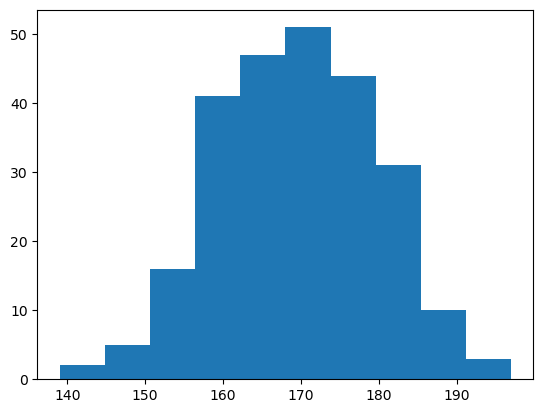

In [36]:
x=np.random.normal(170,10,250)
plt.hist(x)
plt.show()

In [40]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
X = df.iloc[:, [3, 4]].values  

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [64]:
optimal_k = 5


In [66]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [68]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)

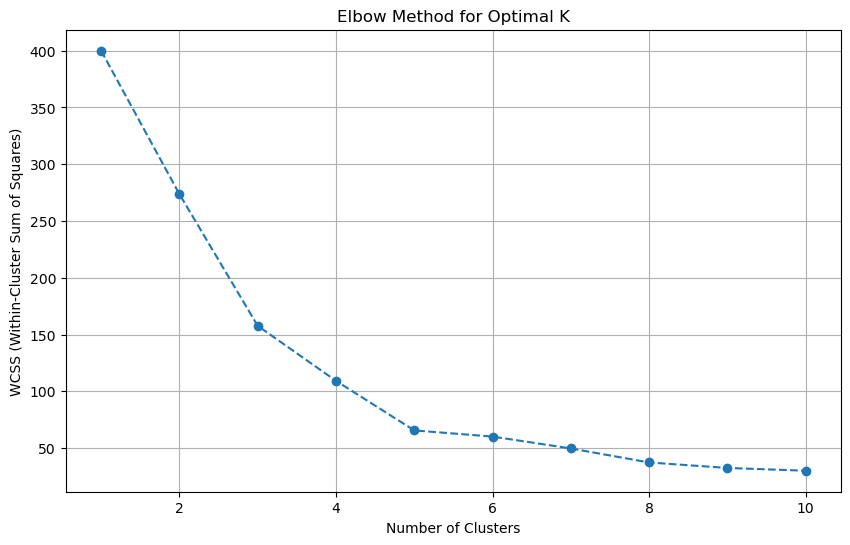

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

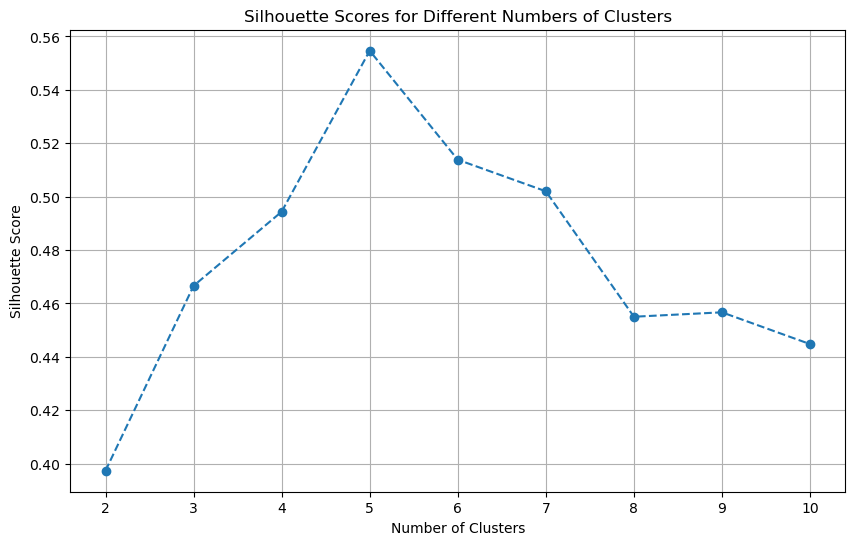

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid()
plt.show()

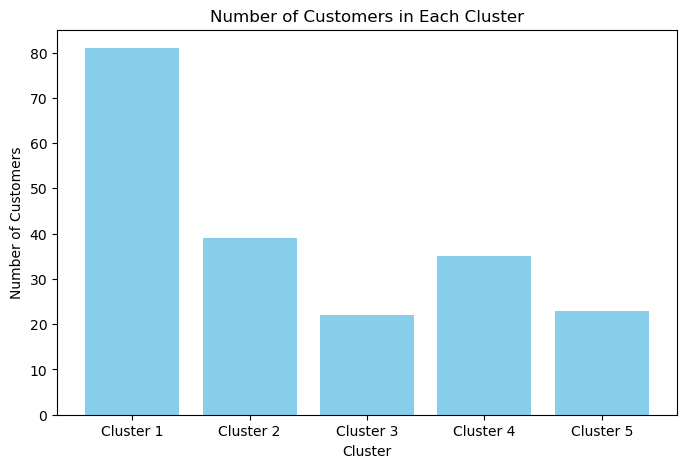

In [74]:
cluster_counts = np.bincount(y_kmeans)
plt.figure(figsize=(8, 5))
plt.bar(range(len(cluster_counts)), cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.xticks(range(len(cluster_counts)), ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

In [76]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)


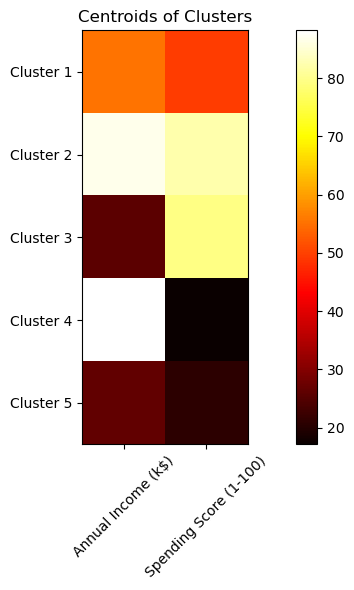

In [80]:
plt.figure(figsize=(10, 6))
plt.imshow(centroids, interpolation='nearest', cmap='hot')
plt.colorbar()
plt.title('Centroids of Clusters')
plt.xticks(range(X.shape[1]), df.columns[[3, 4]], rotation=45)
plt.yticks(range(len(centroids)), ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.tight_layout()
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



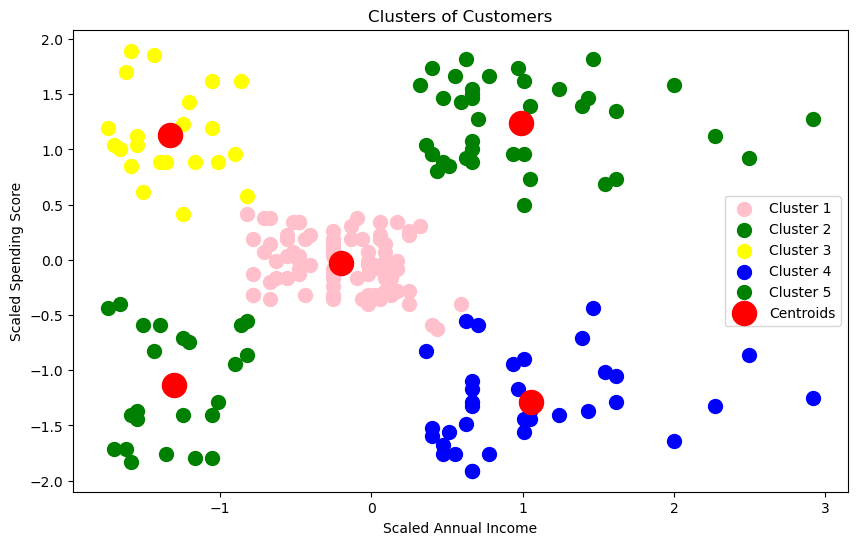

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='pink', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='green', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 5 clusters: 0.5546571631111091


In [92]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\rajes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [94]:
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia}")

Inertia (WCSS): 65.56840815571681


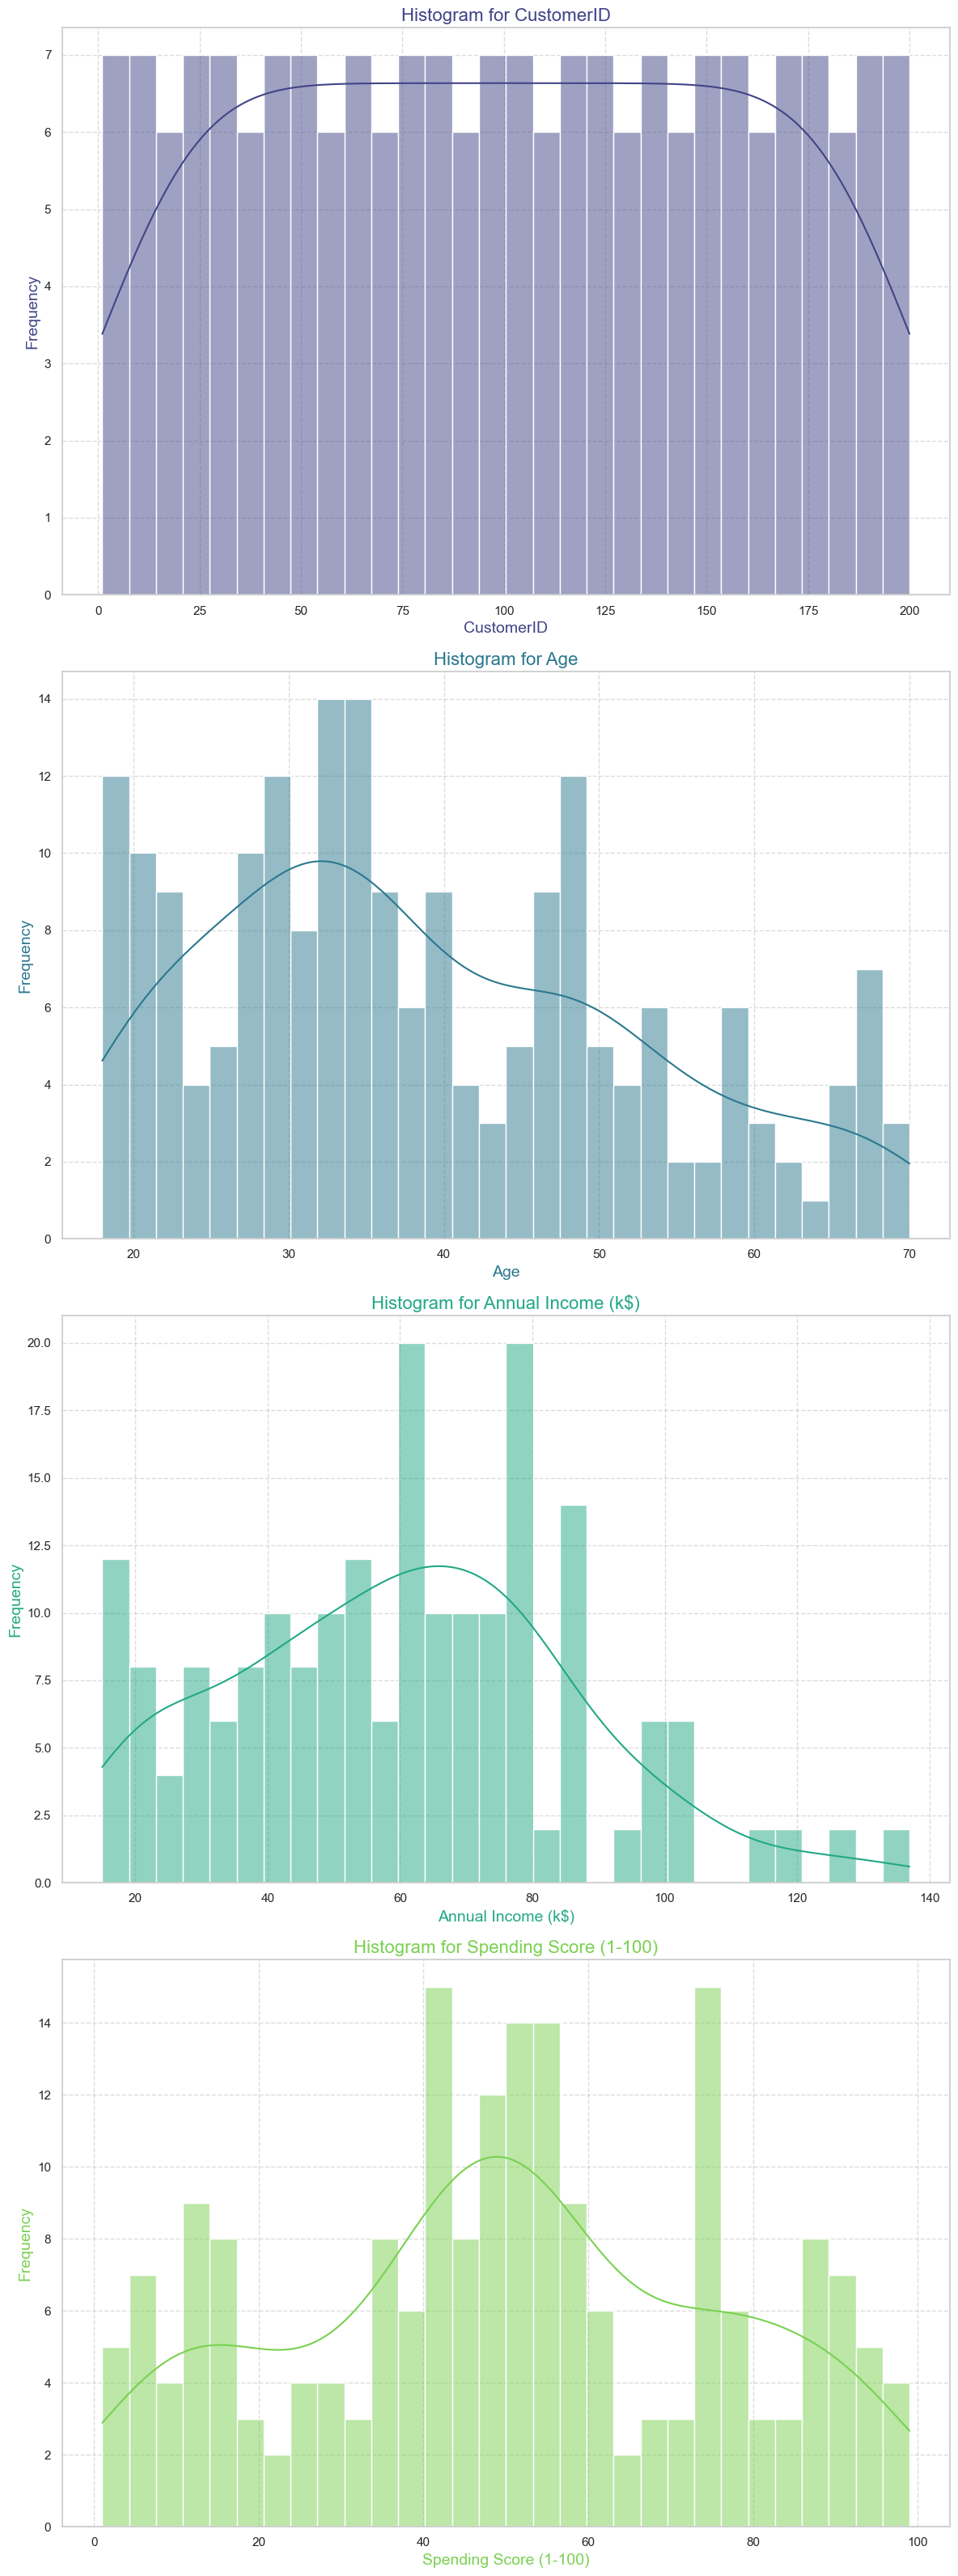

In [109]:
import seaborn as sns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(12, 8 * len(num_cols)))
colors = sns.color_palette("viridis", n_colors=len(num_cols))
for i, (col, color) in enumerate(zip(num_cols, colors)):
    sns.histplot(data=df, x=col, kde=True, color=color, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram for {col}', fontsize=16, color=color)
    axes[i].set_xlabel(col, fontsize=14, color=color)
    axes[i].set_ylabel('Frequency', fontsize=14, color=color)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
+